# Figure 2: Principal Observables applied to COIL-100 Dataset

COIL-100 dataset comprises 72 images of an object from the COIL-100 dataset taken at 5-degree rotations for 100 different objects. Therefore each object can be considered as a metric space with 72 points, comparing different images through Euclidean distance. Here we apply principal observable analysis to one object choosen from the data set. 

"Columbia Object Image Library (COIL-100),"
S. A. Nene, S. K. Nayar and H. Murase,
Technical Report CUCS-006-96, February 1996.

In [1]:
import sys
sys.path.append('..')
from poa_utils import *

In [2]:
# Load images for "object 12 (i.e. T shaped object)" and compute the distance matrix between 5-degree rotated images
Ts = []
for i in range(72):
    d = 5*i
    path = f'../Data/COIL-100/obj{12}__{d}.png'
    c = Image.open(path)
    c = np.array(c) #shape (128,128,3) 
    Ts.append(c)

In [3]:
# Compute the distance matrix (Euclidean distance between grayscale images)
Dist_T = np.zeros((72, 72))
for i in range(72):
    for j in range(i+1, 72):
        x = np.mean(Ts[i], axis = 2)  # Convert to grayscale by taking the mean (R+G+B) / 3
        y = np.mean(Ts[j], axis = 2) 
        w = np.linalg.norm(x - y)
        Dist_T[i, j] = w
        Dist_T[j, i] = w

In [4]:
# Compute 2D POA
np.random.seed(18)
POA_T=poa_metric(Dist_T,2)

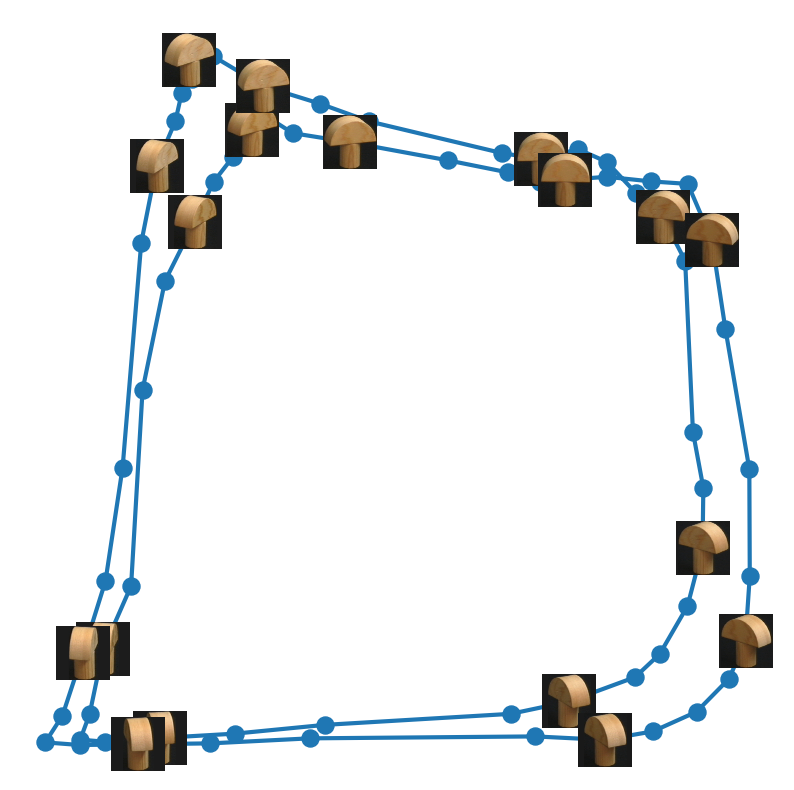

In [5]:
# Select n_images for visualization
n_images = 18
I = [(72//n_images)*i for i in range(n_images)]

x = POA_T[0,I]
y = POA_T[1,I]
c = [Ts[i] for i in I]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks([])
ax.set_yticks([])

line, = ax.plot( POA_T[0], POA_T[1], linewidth=3)
color = line.get_color()
ax.plot(POA_T[0,[71,0]], POA_T[1,[71,0]], linewidth = 3, color = color)
ax.scatter(POA_T[0], POA_T[1], s = 150)

for x0, y0, im in zip(x, y, c):
    ab = AnnotationBbox(getImage(im,0.3), (x0, y0), frameon = False)
    ax.add_artist(ab)

ax.axis('off')
plt.show()

## PCA applied to the same T-Shape

In [6]:
# Apply 2D PCA to same T-shaped object using the distance matrix computed above. 
pca = PCA(n_components = 2)
PCA_T = pca.fit_transform(Dist_T)

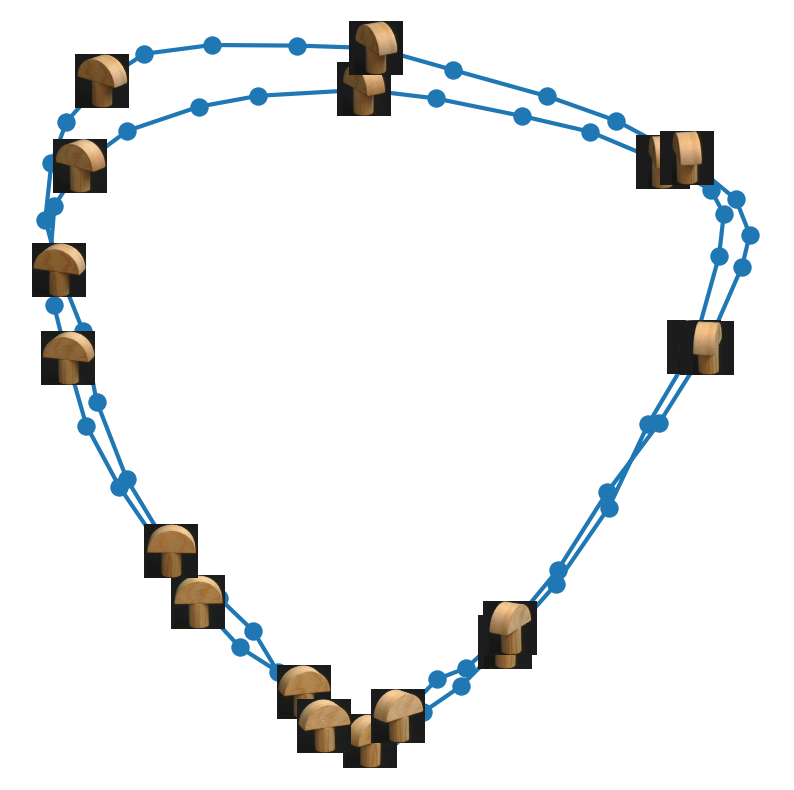

In [7]:
# Coordinates from the first 2 principal components
x = PCA_T[I, 0]
y = PCA_T[I, 1]
c = [Ts[i] for i in I]

# Plot the PCA results with image annotations
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks([])
ax.set_yticks([])

# Plot the PCA components
line, = ax.plot(PCA_T[:, 0], PCA_T[:, 1], linewidth = 3 )
color = line.get_color()
ax.plot([PCA_T[71, 0], PCA_T[0, 0]], [PCA_T[71, 1], PCA_T[0, 1]], linewidth = 3, color = color)  # Close the loop
ax.scatter(PCA_T[:, 0], PCA_T[:, 1], s = 150)

# Annotate the plot with images
for x0, y0, im in zip(x, y, c):
    ab = AnnotationBbox(getImage(im, 0.3), (x0, y0), frameon = False)
    ax.add_artist(ab)

ax.axis('off')
plt.show()